<a href="https://colab.research.google.com/github/eTcilopp/temp_python_intro_course_gb/blob/master/probability_theory/homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 10
Провести дисперсионный анализ для определения того,<br>есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.<br>Даны значения роста в трех группах случайно выбранных спортсменов:<br>
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.<br>
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.<br>
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.<br>


Решение<br>
Нулевая гипотеза: различий в росте нет<br>
Альтернативная гипотеза: статистически значимые различия в росте имеются<br>
Уровень статистической значимости alpha=0.05



In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
fb = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hk = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
hl = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

Объединим данные наблюдений в один датафрейм

In [ ]:
df = pd.DataFrame(
	{
		'score': np.concatenate((fb, hk, hl)),
		'group': ['Футболисты']*len(fb) + ['Хоккеисты']*len(hk) + ['Штангисты']*len(hl)
	}
)

Отобразим данные наблюдений на графике

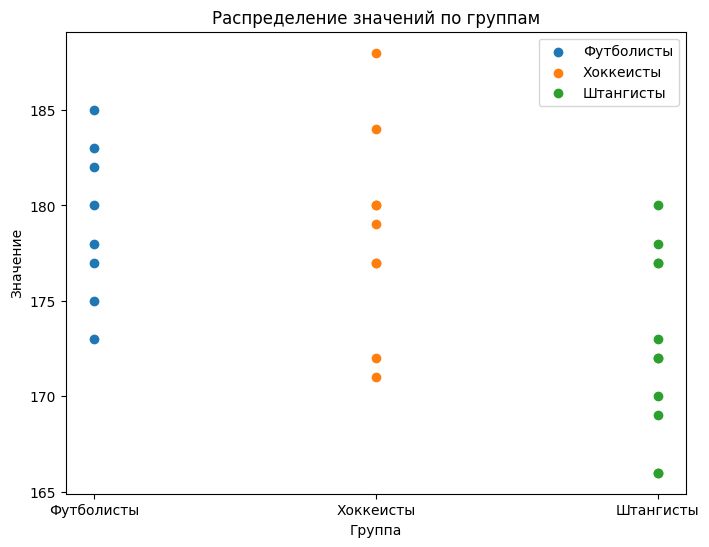

In [15]:
plt.figure(figsize=(8, 6))

# Отображение каждой группы на графике
for group in ['Футболисты', 'Хоккеисты', 'Штангисты']:
    subset = df[df['group'] == group]
    plt.scatter(subset['group'], subset['score'], label=group)

plt.title('Распределение значений по группам')
plt.xlabel('Группа')
plt.ylabel('Значение')
plt.legend()
plt.show()

Проведем однофакторный дисперсионный анализ

In [18]:
res = stats.f_oneway(fb, hk, hl)
print(res)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)


Выводы: поскольку pvalue < alpha 0.05, верна альтернативная гипотеза:<br> статистически значимые различия имеются.<br>
<br>
Выясним, между какими группами имеются статистически значимые различия в росте.

In [19]:
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)

print("Результаты теста Тьюки:\n", tukey)

Результаты теста Тьюки:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Футболисты Хоккеисты  -0.4583  0.979  -6.2732  5.3566  False
Футболисты Штангисты  -6.3977 0.0219 -11.9583 -0.8372   True
 Хоккеисты Штангисты  -5.9394 0.0284 -11.3181 -0.5607   True
------------------------------------------------------------


Выводы:<br>
<br>
Есть статистически значимые различия в росте <br>
Футболистов и Штангистов,<br>
Хоккеистов и Штангистов.<br>
Нет статостически значимых различи в росте<br>
Футболистов и Хоккеистов.
